In [7]:
!pip install kaggle

In [8]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [9]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:00<00:00, 536MB/s] 
100% 163M/163M [00:00<00:00, 579MB/s]


In [10]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
!ls

 data			'WhatsApp Image 2025-06-23 at 11.20.57_b80c0022.jpg'
 face-mask-dataset.zip	'WhatsApp Image 2025-06-23 at 11.22.07_cd704ac8.jpg'
 kaggle.json		'WhatsApp Image 2025-06-23 at 11.23.26_60e19f7a.jpg'
 sample_data		'WhatsApp Image 2025-06-23 at 11.28.14_5568e9ae.jpg'


**Importing the Dependencies**

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_991.jpg', 'with_mask_631.jpg', 'with_mask_279.jpg', 'with_mask_116.jpg', 'with_mask_1418.jpg']
['with_mask_2782.jpg', 'with_mask_2012.jpg', 'with_mask_2716.jpg', 'with_mask_587.jpg', 'with_mask_151.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2475.jpg', 'without_mask_1251.jpg', 'without_mask_3021.jpg', 'without_mask_356.jpg', 'without_mask_30.jpg']
['without_mask_3019.jpg', 'without_mask_426.jpg', 'without_mask_3374.jpg', 'without_mask_3118.jpg', 'without_mask_284.jpg']


In [15]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [16]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

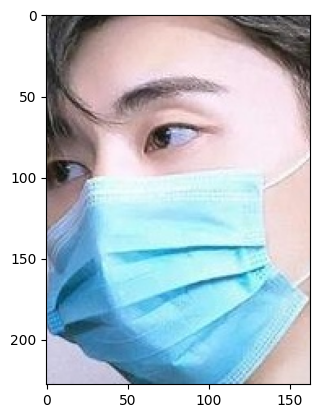

In [20]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

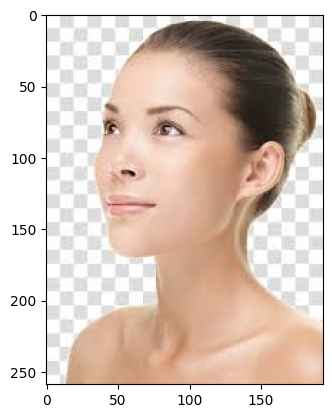

In [21]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [22]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
type(data)

list

In [24]:
len(data)

7553

array([[[185, 184, 189],
        [208, 208, 213],
        [225, 224, 231],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[215, 216, 224],
        [203, 205, 213],
        [205, 206, 217],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[233, 234, 244],
        [191, 192, 201],
        [155, 155, 165],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       ...,

       [[250, 251, 254],
        [248, 249, 253],
        [247, 248, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[250, 251, 255],
        [249, 250, 254],
        [249, 250, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[249, 250, 254],
        [248, 249, 253],
        [248, 249, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]], dtype=uint8)
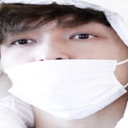

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [29]:
type(X)

numpy.ndarray

In [30]:
type(Y)

numpy.ndarray

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[203, 215, 237],
        [203, 215, 238],
        [204, 216, 239],
        ...,
        [247, 247, 255],
        [239, 241, 250],
        [234, 237, 246]],

       [[208, 219, 244],
        [204, 216, 241],
        [196, 208, 233],
        ...,
        [249, 251, 255],
        [238, 241, 248],
        [231, 234, 243]],

       [[201, 213, 244],
        [189, 202, 232],
        [165, 178, 207],
        ...,
        [248, 251, 255],
        [242, 245, 252],
        [238, 241, 249]],

       ...,

       [[ 23,  22,  21],
        [ 22,  21,  20],
        [ 19,  19,  18],
        ...,
        [ 14,  13,   9],
        [ 14,  13,   9],
        [ 14,  13,   9]],

       [[ 23,  23,  21],
        [ 22,  22,  20],
        [ 21,  21,  19],
        ...,
        [ 14,  13,   9],
        [ 14,  13,   9],
        [ 14,  13,   9]],

       [[ 22,  22,  20],
        [ 21,  21,  19],
        [ 19,  19,  17],
        ...,
        [ 13,  12,   8],
        [ 13,  12,   8],
        [ 13,  12,   8]]], dtype=uint8)
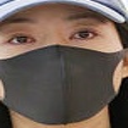

In [36]:
X_train[0]

In [37]:
X_train_scaled[0]

array([[[0.79607843, 0.84313725, 0.92941176],
        [0.79607843, 0.84313725, 0.93333333],
        [0.8       , 0.84705882, 0.9372549 ],
        ...,
        [0.96862745, 0.96862745, 1.        ],
        [0.9372549 , 0.94509804, 0.98039216],
        [0.91764706, 0.92941176, 0.96470588]],

       [[0.81568627, 0.85882353, 0.95686275],
        [0.8       , 0.84705882, 0.94509804],
        [0.76862745, 0.81568627, 0.91372549],
        ...,
        [0.97647059, 0.98431373, 1.        ],
        [0.93333333, 0.94509804, 0.97254902],
        [0.90588235, 0.91764706, 0.95294118]],

       [[0.78823529, 0.83529412, 0.95686275],
        [0.74117647, 0.79215686, 0.90980392],
        [0.64705882, 0.69803922, 0.81176471],
        ...,
        [0.97254902, 0.98431373, 1.        ],
        [0.94901961, 0.96078431, 0.98823529],
        [0.93333333, 0.94509804, 0.97647059]],

       ...,

       [[0.09019608, 0.08627451, 0.08235294],
        [0.08627451, 0.08235294, 0.07843137],
        [0.0745098 , 0

**Building a Convolutional Neural Networks (CNN)**

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
from keras import Sequential, Input, layers

num_of_classes = 2

model = Sequential()

model.add(Input(shape=(128, 128, 3)))  # define input shape separately

model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_of_classes, activation='sigmoid'))


In [47]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [48]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - acc: 0.6752 - loss: 0.7241 - val_acc: 0.8893 - val_loss: 0.2633
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8853 - loss: 0.3016 - val_acc: 0.9190 - val_loss: 0.2264
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9186 - loss: 0.2267 - val_acc: 0.9140 - val_loss: 0.2143
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9285 - loss: 0.1770 - val_acc: 0.9273 - val_loss: 0.1749
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9476 - loss: 0.1403 - val_acc: 0.9091 - val_loss: 0.2367
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9415 - loss: 0.1419 - val_acc: 0.9273 - val_loss: 0.1775
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9611 - loss: 0.1048 - val_acc: 0.9107 - val_loss: 0.2075
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9596 - loss: 0.1058 - val_acc: 0.9107 - val_loss: 0.2249
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/

**Model Evaluation**

In [52]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9298 - loss: 0.2682
Test Accuracy = 0.9258769154548645


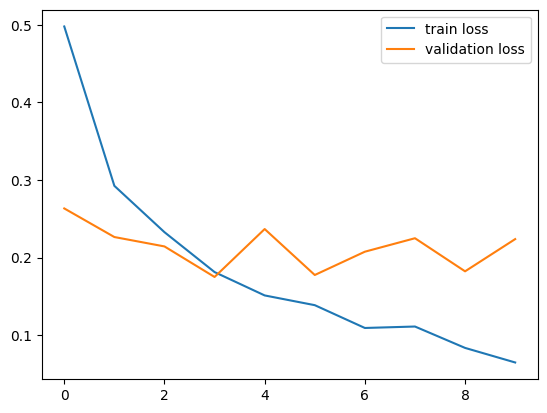

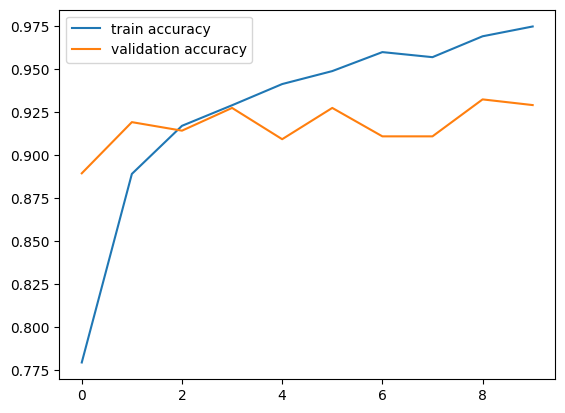

In [53]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/WhatsApp Image 2025-06-23 at 11.20.57_b80c0022.jpg


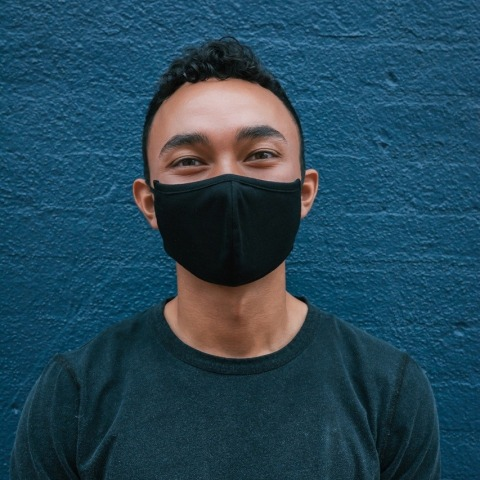

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
[[0.3836539 0.6507917]]
1
The person in the image is wearing a mask


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/WhatsApp Image 2025-06-24 at 10.39.46_b8854ddc.jpg


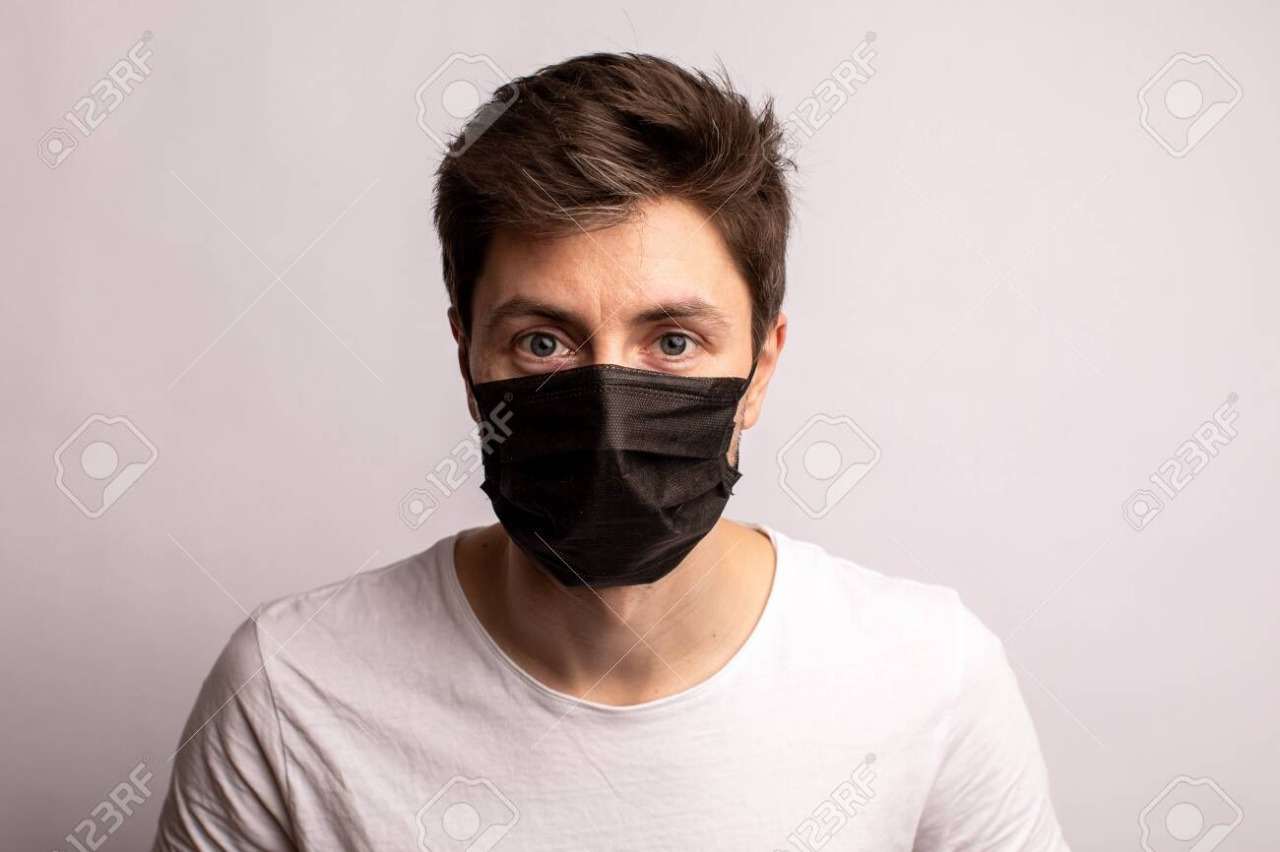

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[0.889597   0.11040304]]
0
The person in the image is not wearing a mask


In [68]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/WhatsApp Image 2025-06-24 at 10.40.21_3019f507.jpg


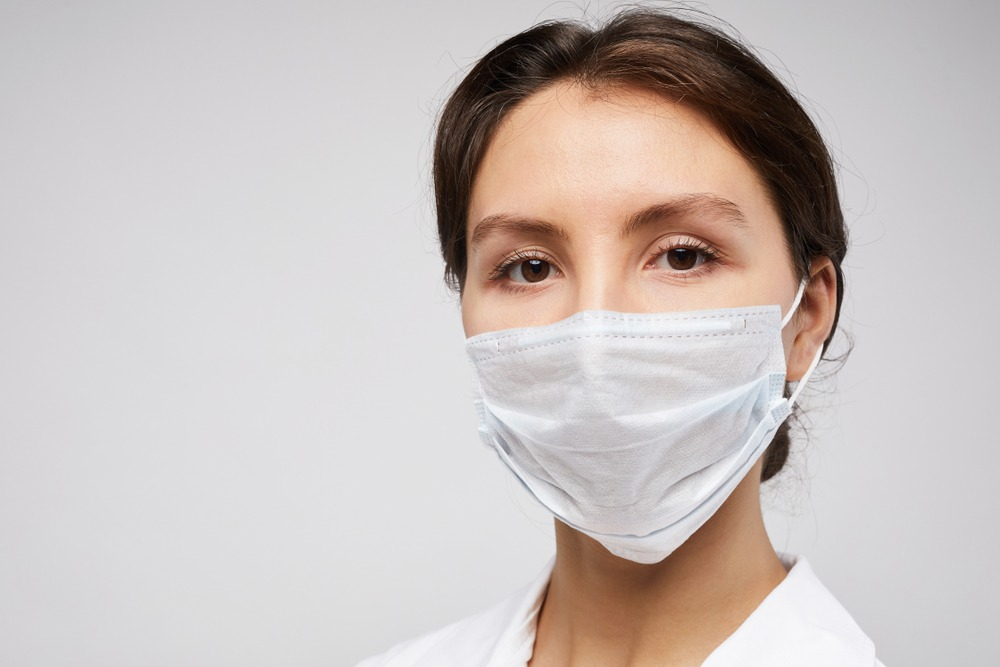

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.8895922  0.11040779]]
0
The person in the image is not wearing a mask


In [69]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [57]:
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [59]:
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [60]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred, axis=1)

print(confusion_matrix(Y_test, y_pred_labels))
print(classification_report(Y_test, y_pred_labels))


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step
[[  0 768]
 [  0 743]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       768
           1       0.49      1.00      0.66       743

    accuracy                           0.49      1511
   macro avg       0.25      0.50      0.33      1511
weighted avg       0.24      0.49      0.32      1511



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weight_dict = dict(enumerate(class_weights))

history = model.fit(
    X_train_scaled, Y_train,
    validation_split=0.1,
    epochs=15,
    class_weight=class_weight_dict
)


Epoch 1/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - acc: 0.4841 - loss: 0.8163 - val_acc: 0.4860 - val_loss: 0.7096
Epoch 2/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - acc: 0.4996 - loss: 0.6723 - val_acc: 0.4860 - val_loss: 0.6251
Epoch 3/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - acc: 0.7071 - loss: 0.5919 - val_acc: 0.9107 - val_loss: 0.5425
Epoch 4/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9529 - loss: 0.4979 - val_acc: 0.9174 - val_loss: 0.4529
Epoch 5/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9388 - loss: 0.4171 - val_acc: 0.9140 - val_loss: 0.3903
Epoch 6/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.9433 - loss: 0.3465 - val_acc: 0.8876 - val_loss: 0.3945
Epoch 7/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9500 - loss: 0.2892 - val_acc: 0.9091 - val_loss: 0.3220
Epoch 8/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9524 - loss: 0.2494 - val_acc: 0.9157 - val_loss: 0.2960
Epoch 9/15
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms

In [63]:
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
